In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress



# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

In [3]:
citylist = []
cloudlist = []
countrylist = []
datelist = []
humiditylist = []
latlist = []
longslist = []
maxtemplist = []
windspeed = []
indexcounter = 0
setcounter = 1


print("Beginning Data Retrieval ")
print("-------------------------------")


base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#For loop matching city names with city_list using enumerate method
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        citylist.append(response["name"])
        cloudlist.append(response["clouds"]["all"])
        countrylist.append(response["sys"]["country"])
        datelist.append(response["dt"])
        humiditylist.append(response["main"]["humidity"])
        latlist.append(response["coord"]["lat"])
        longslist.append(response["coord"]["lon"])
        maxtemplist.append(response['main']['temp_max'])
        windspeed.append(response["wind"]["speed"])
        
        if indexcounter > 49:
            indexcounter = 0
            setcounter = setcounter + 1
        
        else:
            indexcounter = indexcounter + 1
        
        print(f"Processing Record {indexcounter} of Set {setcounter} : {city}")
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

Beginning Data Retrieval 
-------------------------------
Processing Record 1 of Set 1 : lebu
Processing Record 2 of Set 1 : butaritari
Processing Record 3 of Set 1 : yangjiang
Processing Record 4 of Set 1 : hasaki
Processing Record 5 of Set 1 : busselton
Processing Record 6 of Set 1 : novoagansk
Processing Record 7 of Set 1 : constitucion
Processing Record 8 of Set 1 : chuy
Processing Record 9 of Set 1 : khandagayty
City not found. Skipping...
Processing Record 10 of Set 1 : necochea
Processing Record 11 of Set 1 : barrow
Processing Record 12 of Set 1 : rikitea
Processing Record 13 of Set 1 : pundaguitan
Processing Record 14 of Set 1 : santa cruz
Processing Record 15 of Set 1 : noumea
City not found. Skipping...
Processing Record 16 of Set 1 : bredasdorp
Processing Record 17 of Set 1 : adrar
Processing Record 18 of Set 1 : whitianga
City not found. Skipping...
City not found. Skipping...
Processing Record 19 of Set 1 : leshukonskoye
Processing Record 20 of Set 1 : dauphin
Processing R

In [4]:
weather_df=pd.read_csv(output_data_file, encoding='Latin-1')
weather_df.count()


City_ID       548
City          548
Cloudiness    548
Country       544
Date          548
Humidity      548
Lat           548
Lng           548
Max Temp      548
Wind Speed    548
dtype: int64

In [6]:
weather_df.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


In [8]:
weather_df.to_csv("documents/cities.csv", index=False)

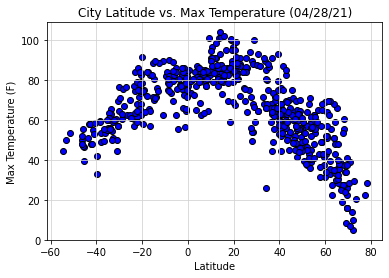

In [10]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"],edgecolors="black",facecolors="blue")
plt.title("City Latitude vs. Max Temperature (04/28/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Latitude vs. Temperature Plot.png")
plt.show()

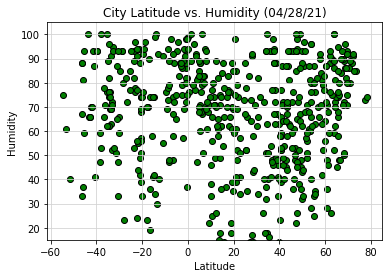

In [13]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolors="black",facecolors="green")
plt.title("City Latitude vs. Humidity (04/28/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Latitude vs. Humidity PlotRyan.png")
plt.show()

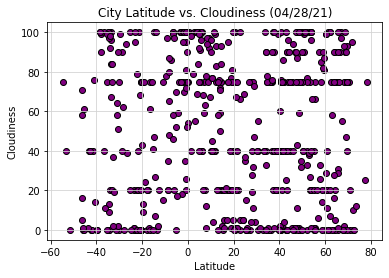

In [15]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolors="black",facecolors="purple")
plt.title("City Latitude vs. Cloudiness (04/28/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Latitude vs. Cloudiness PlotRyan.png")
plt.show()

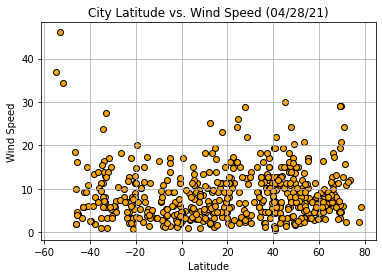

In [18]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], color = "orange", edgecolor = "black")

plt.title("City Latitude vs. Wind Speed (04/28/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)
plt.savefig("City Latitude vs Wind Speed PlotRyan.png")

# Plot 1 is analyzing the effect of city latitude on max temperature. In this plot, the highest temperature is towards the 0-20 latitude range
# Plot 2 is analyzing the effect of city latitude on humidity. There is no observable trend as the points are scattered throughout the plot.
# Plot 3 is measuring the effect of latitude on cloudiness level. Similar to plot 2, there is no obeservable trend in this graph
# Plot 4 is measuring the effect of city latitude on wind speed. There is a trend where the data points seem to hover between 0-20 for wind speeds. However, there are some outliers as seen towards the -60 degree latitude.